In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df=pd.read_csv('laptop_data.csv')

In [249]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [250]:
df.shape

(1303, 12)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [252]:
df.duplicated().sum()

0

In [253]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [254]:
#df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)

In [255]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [256]:
#remove the gb and kg from the ram an weight
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [257]:
df


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [258]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\HP PC\AppData\Local\Temp\ipykernel_11816\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

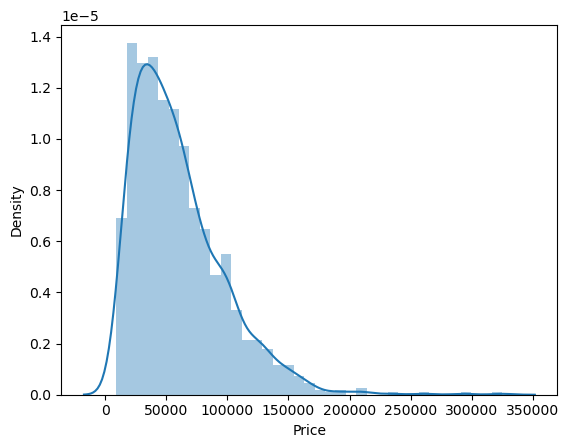

In [260]:
sns.distplot(df['Price'])

C:\Users\HP PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


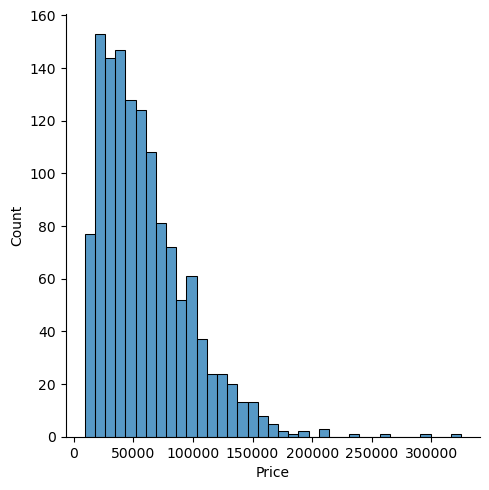

In [261]:
sns.displot(df['Price'])

<Axes: xlabel='Company'>

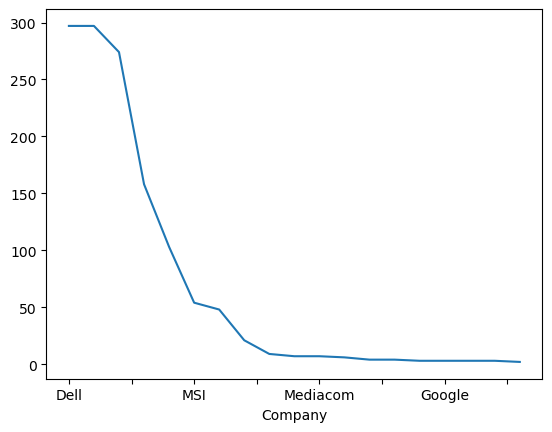

In [262]:
df['Company'].value_counts().plot()

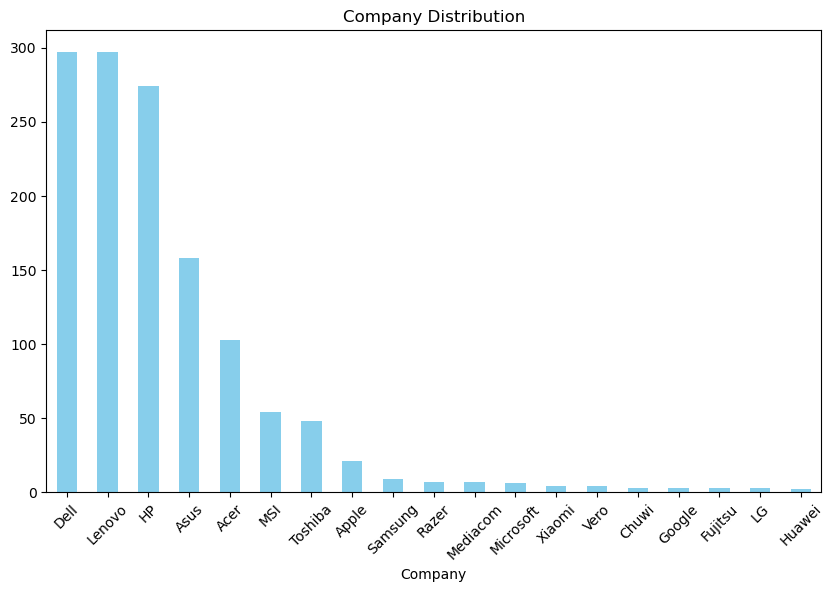

In [263]:
df['Company'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6), title='Company Distribution')

plt.xticks(rotation=45)
plt.show()


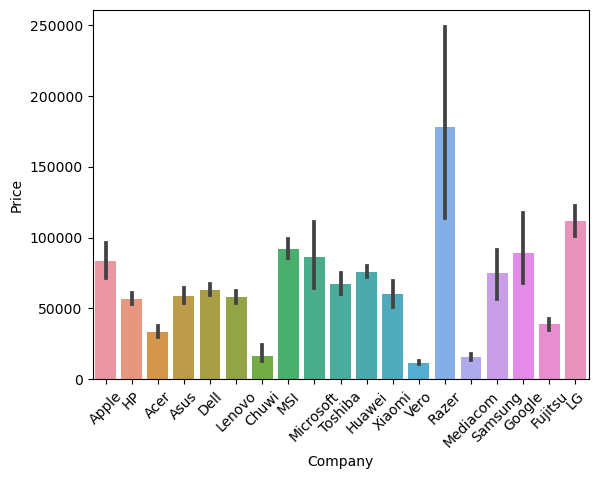

In [264]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='TypeName'>

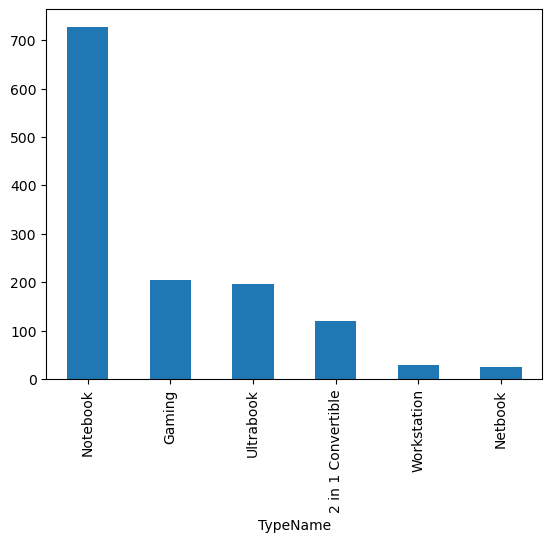

In [265]:
df['TypeName'].value_counts().plot(kind='bar')

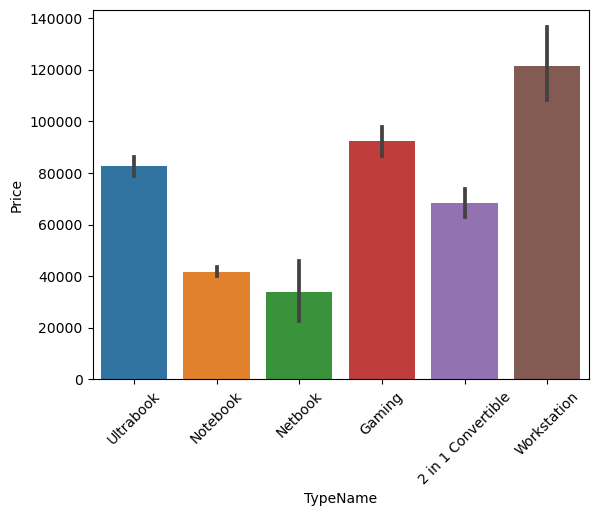

In [266]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

C:\Users\HP PC\AppData\Local\Temp\ipykernel_11816\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

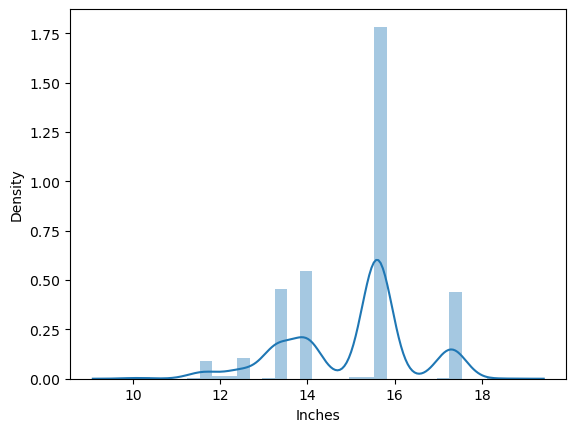

In [267]:
sns.distplot(df['Inches'])

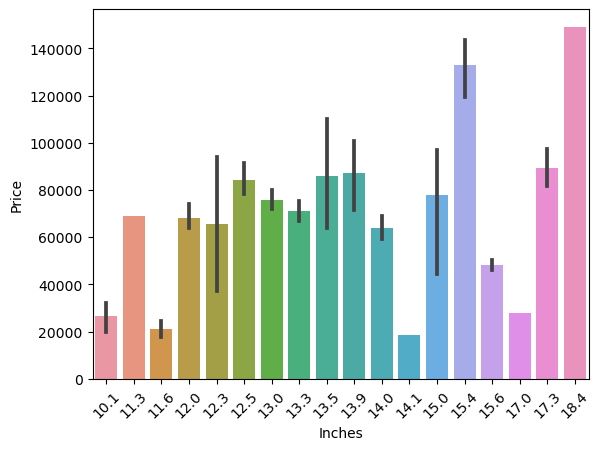

In [268]:
sns.barplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

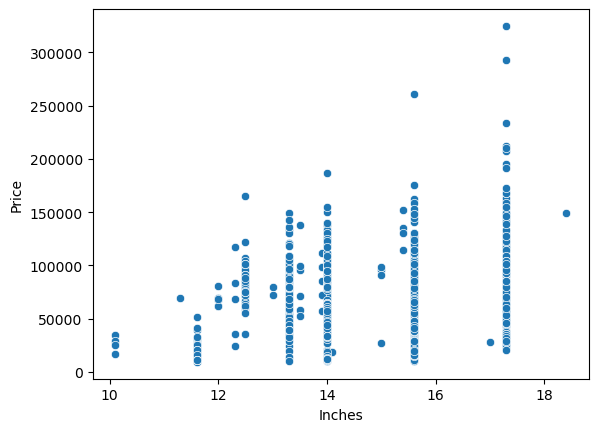

In [269]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
#notso strong coorelation but there is a relationn as very scattered data

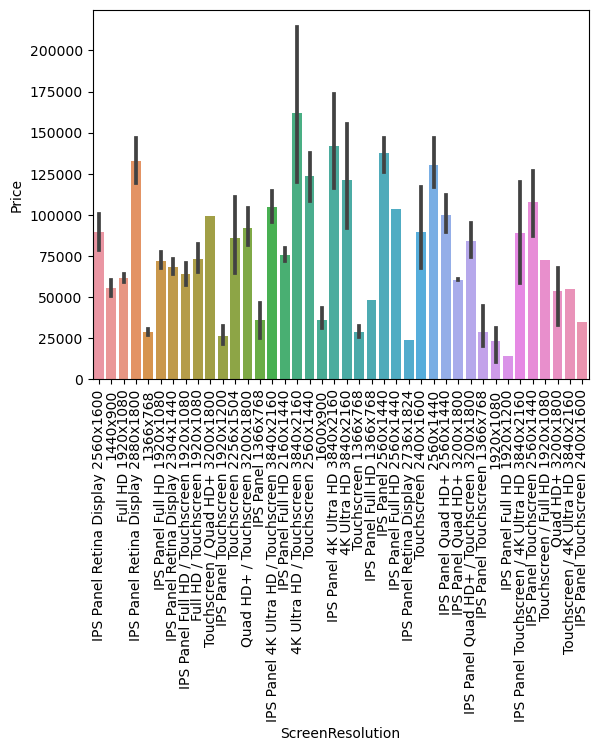

In [270]:
sns.barplot(x=df['ScreenResolution'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()
#difficult to sortt and get the ans

In [271]:
df['ScreenResolution'].value_counts()#differnce is resolution and touchscreen ,non touch screen,

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [272]:
df['Touchscreen']= df['ScreenResolution'].apply(lambda x:1 if'Touchscreen' in x else 0)

In [273]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
552,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,143802.7200,0
794,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,62071.2000,0
374,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,46300.8528,1
1147,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.18,53807.4720,0
380,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,63456.4800,0


<Axes: xlabel='Touchscreen'>

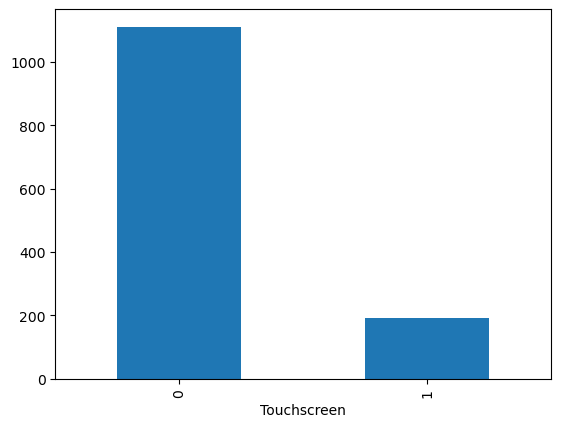

In [274]:
df['Touchscreen'].value_counts().plot(kind='bar')#count of touch and non touch

In [275]:
#price and touchscreen if there any difference
sns.barplot(x=df['Touchscreen'],y=df['Price'])
#conclusion effects the Price


KeyboardInterrupt



<Figure size 640x480 with 0 Axes>

In [ ]:
#now same for ipl
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS'in x else 0)

In [ ]:
df.head()

In [ ]:
df['IPS'].value_counts().plot(kind='bar')

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [ ]:
#resolution expand
new=df['ScreenResolution'].str.split('x',n=1,expand=True)
new

In [ ]:
df.head()

In [ ]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [ ]:
#alternative of df.corr()['Price as it was not working']
# Step 1: Select numeric columns (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()
price_correlations = correlation_matrix['Price']
price_correlations

In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

In [ ]:
df.info()

In [ ]:
df['X_res']=df['X_res'].astype('int')

In [ ]:
df['Y_res']=df['Y_res'].astype('int')

In [ ]:
df.info()

In [ ]:
#see if any thing cn be merged,,,,here ppi
df['ppi']=(((df['X_res']**2)+df['Y_res']**2)**0.5/df['Inches']).astype('float')

In [ ]:
#alternative of df.corr()['Price as it was not working']
# Step 1: Select numeric columns (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()
price_correlations = correlation_matrix['Price']
price_correlations

In [ ]:
df.drop(columns=['Inches','X_res','Y_res','ScreenResolution'],inplace=True)

In [ ]:
df.head()

In [ ]:
df.sample(10)

In [ ]:
#cpu
df['Cpu'].value_counts()

In [ ]:
sns.barplot(x=df['Cpu'],y=df['Price'])

In [ ]:
df['cpu name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))
df.head()

In [ ]:
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


In [ ]:
df['cpu brand']=df['cpu name'].apply(processor)

In [ ]:
df.head()

In [ ]:
df['cpu brand'].value_counts().plot(kind='bar')

In [ ]:
sns.barplot(x=df['cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
df.drop(columns=['Cpu','cpu name'],inplace=True)

In [ ]:
df.head()

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
#effects the memoryy

In [ ]:
df.sample(9)

In [ ]:
df['Memory'].value_counts()

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

#df["first"] = df["first"].astype(int)
# ... (previous code)

# Remove non-digit characters from the 'first' column
df["first"] = df["first"].str.extract('(\d+)').astype(int)

# ... (continue with your calculations)
df["second"] = df["second"].str.extract('(\d+)').astype(int)
#df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [ ]:
df.sample(9)

In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.head()

In [ ]:
#alternative of df.corr()['Price as it was not working']
# Step 1: Select numeric columns (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()
price_correlations = correlation_matrix['Price']
price_correlations

In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
df['Gpu'].value_counts()

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df.head()

In [ ]:
df['Gpu brand'].value_counts()

In [ ]:
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df['Gpu brand'].value_counts()

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['OpSys'].value_counts()

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
def fxn(inp):
    if inp=='Windows 10'or inp=='Windows 7' or inp=='Windows 10 S':
        return'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os']=df['OpSys'].apply(fxn)

In [ ]:
df.drop(columns=['OpSys'],inplace=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#alternative of df.corr()['Price as it was not working']
# Step 1: Select numeric columns (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['number'])

# Step 2: Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()
price_correlations = correlation_matrix['Price']
price_correlations


In [ ]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
sns.distplot(df['Weight'])


In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])


In [ ]:
#sns.heatmap(df.corr())#more darker means strong relation cn take one as not working

# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
sns.distplot(df['Price'])#skewed data

In [ ]:
sns.distplot(np.log(df['Price']))#normalize the data

In [ ]:
df.drop(columns=['Gpu'],inplace=True)
df.head()

In [ ]:
#test  and train the data
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [ ]:
y#norml\alize form

In [ ]:
X


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
X_train

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Linear Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
np.exp(0.21)# putting value of mea we cn see the differnce as per theshown here

# Ridge Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
    
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
np.exp(0.19)

# lasso regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# KNN

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# DECISION TREE

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


In [ ]:
np.exp(0.18)

# SVM

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


# Random Forest


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,# parameter specifies the number of decision trees 
                              random_state=3,# This parameter sets the random seed for reproducibility. By fixing the random state, you ensure that the random processes within the algorithm are consistent across runs.
                              max_samples=0.7,#This parameter controls the proportion of samples used for training each individual decision tree
                              max_features=0.75,#This parameter specifies the proportion of features considered for splitting a node in each individual decision tree. 
                              max_depth=15)#: This parameter limits the maximum depth of each decision tree in the forest. A tree's depth represents how many splits it has before reaching a leaf node.

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
np.exp(0.157)

# AdaBoost


In [244]:
from sklearn.ensemble import AdaBoostRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7937753516098806
MAE 0.22954752244999668


C:\Users\HP PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [245]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [246]:
!pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/34/01/9d1460a6e71d6226e1f5c5053de20758c41100c5c15abb73551273a96fb8/streamlit-1.27.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/17/16/b12fca347ff9d062e3c44ad9641d2ec50364570a059f3078ada3a5119d7a/altair-5.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bf/2b/11bcedb7dee4923253a4a21bae3be854bcc4f06295bd827756352016d97c/blinker-1.6.3-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a9/c9/c8a7710f2cedcb1db9224fdd4d8307c9e48cbddc46c18b515fefc0f1abbe/cachetools-5.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf<5,>=3.20 from https://files.pythonhosted.org/packages/c2/59/f89c04923d68595d359f4cd7adbbdf5e5d791257945f8873d88b2fd1f